<span style="color:#013769; font-size:18px; font-weight:bold;">Is race/gender diversity correlated with voting for <span style="color:#0015BC">Democratic</span>
/
<span style="color:#FF0000">Republican</span> parties in Senate Election or not?</span><br>

<span style="color:mediumpurple; font-weight:bold; font-size:17px;">Background and Motivation</span>

<span style="color:#747678; font-size:14px;">Although many states/counties are considered safe for political parties, some others are not reliable at all. Such that, previously claimed Democratic-held seats turn to be be Republican and vice versa. The race between two parties in a state/county is sometimes too close that follows a runoff. Moreover, some states and counties gradually lean towards another party. This gradual change which leads to flipping of a state/county blue or red, is affected by numerous measurable and immeasurable factors, one of which could be immigration rates. Based on Migration Policy Institute (MPI) report, as of 2018, 44.7 million immigrants live in USA, many of whom will become citizens and eligible to vote within a few years. <br>
Also, there's a common sense between many immigrants that the states with more immigrants and mixed raced communities are more leaning towards a particular group (Democrats) like California and New York. <br> My goal is evaluating the accuracy of this common sense.<br>
While a few hundreds of votes can flip a county or even an state, it worths studying whether increase in size of this significant groups (immigrants and/or increase in race diversity) is correlated with a county/states leaning towards a particular party or not since candidates of different parties mostly have some known and ofter strict immigration policies. In this project I will study the effect of immigration rate and increase in racial groups which alters demographic population on change in inclination to vote for different parties in counties and states. </span>

<span style="color:mediumpurple; font-weight:bold; font-size:17px;">Datasets I used:</span>

<span style="color:lightsalmon; font-weight:bold; font-size:15px;">Population and Housing Unit Estimates Datasets</span>: https://www.census.gov/programs-surveys/popest/data/data-sets.html<br>

<span style="color:lightsalmon; font-weight:bold; font-size:15px;">U.S. Senate votes 1976–2018
Version 4.0</span>: 
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/PEJ5QU<br>

<span style="color:mediumpurple; font-weight:bold; font-size:17px;">Sources:</span><br>

<span style="color:crimson; font-weight:bold; font-size:15px;">1.</span>
<span style="color:lightsalmon; font-weight:bold; font-size:15px;">U.S. Immigrant Population by State and County
</span> : https://www.migrationpolicy.org/programs/data-hub/charts/us-immigrant-population-state-and-county<br>

<div style="background-color:crimson; color: lightsalmon; font-weight:bold; font-size:15px;">U.S. Senate votes 1976–2018</div>

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Importing Libraries</span></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Loading Datasets</span></div>

In [2]:
#U.S. Senate votes 1976–2018
senate_1976_2018 = pd.read_csv("1976-2018-senate.csv", encoding = 'unicode_escape')
senate_1976_2018.shape

(3421, 18)

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Exploring the dataset content</span></div>

<span style="color:#747678; font-size:14px;">U.S. Senate votes 1976–2018 contains 3421 rows and 18 columns</span>

In [3]:
#columns
np.array(senate_1976_2018.columns)

array(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'special', 'candidate', 'party',
       'writein', 'mode', 'candidatevotes', 'totalvotes', 'unofficial',
       'version'], dtype=object)

<span style="color:#747678; font-size:14px;">Columns are <strong>'year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',  'office', 'district', 'stage', 'special', 'candidate', 'party', 'writein', 'mode', 'candidatevotes', 'totalvotes', 'unofficial', 'version'</strong>, many of which are not useful for us, so we'll drop some of them in the following</span>

<span style="color:#747678; font-size:14px;">Depicting the first 5 rows of this dataset with <strong>head</strong> method.<br></span>

In [5]:
senate_1976_2018.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,total,321236,741210,False,20171011.0
1,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Wm. Mathews Feighan,independent,False,total,1565,741210,False,20171011.0
2,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,total,400334,741210,False,20171011.0
3,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Allan Norwitz,libertarian,False,total,7310,741210,False,20171011.0
4,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Bob Field,independent,False,total,10765,741210,False,20171011.0


<div style="background-color:#FFCD00;"><span style="color:#182B49;">Checking for null cells in the dataset </span></div>

<span style="color:#747678; font-size:14px;">Though in many cases one can substitute null cells within a dataset with the most common (frequent) value, mean, mode, etc of the corresponding column, here as we are dealing with the actual votes, if the number of null values are small and hence negligible, we won't substitute these null values and will delete the corresponding rows of the null elements.</span>

In [6]:
#columns which contain null values and the number of null elements
null_counts = senate_1976_2018.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) 
#future: ratio of different groups affects the result orr not: #main

party        563
candidate    410
version        1
dtype: int64

In [7]:
party_null_percentage = 563/len(senate_1976_2018) #percentage of null values in party
round(party_null_percentage, 2) 

0.16

<span style="color:#747678; font-size:14px;">In <strong>Party</strong> column, 16 percent of rows contain null value. Since this is not a neglegible number and with a high probablity the people without party are those not included in main parties (otherwise their political party would be recorded), we preserve the rows with null <strong>Party</strong>. We just put None instead of null.<br>
    About <strong>Candidate</strong> column which contains candidates' names, it is not of importance for us, so we just ignore it and keep the corresponding columns and put "not recorded" instead of null. Also, I guess for most of the candidates without name, party is also not preserved. I'll check it in the following.<br>
Also, <strong>version</strong> column is not of interest for us as will be seen in the future. This column will be entirely omited as is not relevant to our study.</span>

In [8]:
#checking whether rows with null values in party are the ones which doesn't also contain candidate names or not. 
party_nulls = list(senate_1976_2018['party'].isnull()) #list of null/not null elements of column "party" as True/False
candidate_nulls = list(senate_1976_2018['candidate'].isnull()) #list of null/not null elements of column "candidate" as True/False

#checking the common elements of the two above lists
common = 0
for i in range(len(party_nulls)):
    if party_nulls[i] == True and candidate_nulls==True:
        common+=1
print("There are {} common elements in party_nulls and candidate_nulls.".format(common))

There are 0 common elements in party_nulls and candidate_nulls.


<span style="color:#747678; font-size:14px;">Based on above cell, our guess is not true as there's no relation between a candidate's name not being recorded and their party not being recorded.</span>

<span style="color:#747678; font-size:14px;">Substituting "not recorded" with "null" in null cells of party and candidate columns. I want to depict it as not recorded because the number of votes for each of the not recorded parties might be high and not negligible.</span>

In [9]:
senate_1976_2018.party.replace(np.NaN, 'not recorded', inplace=True) #substituting "null" with "not recorded"
senate_1976_2018.candidate.replace(np.NaN, 'not recorded', inplace=True) #substituting "null" with "not recorded"
senate_1976_2018.version.replace(np.NaN, 'not recorded', inplace=True) #substituting "null" with "not recorded"

In [10]:
#checking number of nulls / whether the above line worked or not (substituted nulls with string "not recorded")
null_counts = senate_1976_2018.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) 

Series([], dtype: int64)

<span style="color:#747678; font-size:14px;">Null cells are substituted with "not recorded"</span>

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Exploring dataset columns</span></div>

<span style="color:#747678; font-size:14px;">Checking either of the columns, unique item in it and whether it is useful for us or not<br></span>

In [11]:
#version column 
#it is of no value for our research so we will drop it
np.unique(str(senate_1976_2018['version'])) #unique elements in this column

array(['0        2.0171e+07\n1        2.0171e+07\n2        2.0171e+07\n3        2.0171e+07\n4        2.0171e+07\n           ...     \n3416    2.01901e+07\n3417    2.01901e+07\n3418    2.01901e+07\n3419    2.01901e+07\n3420    2.01901e+07\nName: version, Length: 3421, dtype: object'],
      dtype='<U262')

In [12]:
#officially and unofficially reported votes
print("Official: ", list(senate_1976_2018['unofficial']).count(False))
print("Unofficial: ", list(senate_1976_2018['unofficial']).count(True))

Official:  3418
Unofficial:  3


In [13]:
print(len(list(np.unique(senate_1976_2018['state']) )))#unique elements in column "state"
np.unique(senate_1976_2018['state'])

50


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [14]:
np.min(np.unique(senate_1976_2018['year'])), np.max(np.unique(senate_1976_2018['year']))

(1976, 2018)

In [15]:
np.unique(senate_1976_2018['district']) #unique elements in this column

array(['statewide'], dtype=object)

In [16]:
np.unique(senate_1976_2018['stage']) #unique elements in this column

array(['gen', 'pre'], dtype=object)

In [17]:
#columns
senate_1976_2018.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'special', 'candidate', 'party',
       'writein', 'mode', 'candidatevotes', 'totalvotes', 'unofficial',
       'version'],
      dtype='object')

In [18]:
np.unique(senate_1976_2018['office']) #unique elements in this column

array(['US Senate'], dtype=object)

In [19]:
np.unique(senate_1976_2018['state_ic']) #unique elements in this column

array([ 1,  2,  3,  4,  5,  6, 11, 12, 13, 14, 21, 22, 23, 24, 25, 31, 32,
       33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52,
       53, 54, 56, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 81, 82])

In [20]:
np.unique(senate_1976_2018['state_cen']) #unique elements in this column

array([11, 12, 13, 14, 15, 16, 21, 22, 23, 31, 32, 33, 34, 35, 41, 42, 43,
       44, 45, 46, 47, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 71,
       72, 73, 74, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95])

In [21]:
np.unique(senate_1976_2018['state_fips']) #unique elements in this column

array([ 1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [22]:
np.unique(senate_1976_2018['district']) #unique elements in this column

array(['statewide'], dtype=object)

In [23]:
np.unique(senate_1976_2018['special']) #unique elements in this column

array([False,  True])

In [24]:
np.unique(senate_1976_2018['candidate']) #unique elements in this column

array(['"Charlie" Melancon', '"Jay" Patel', '"Jim" Donelon', ..., 'other',
       'other candidates', 'scatter'], dtype=object)

In [25]:
#unique parties
np.unique(senate_1976_2018['party']) #unique elements in this column

array(['Independent for Liberty', 'a connecticut party',
       'alaska libertarian', 'alaskan independence', 'america first',
       'american', 'american constitution', 'american constitution party',
       'american independent', 'american shopping party',
       'anti-bushist candidate', 'anti-prohibition',
       'bob quast for term limits', 'boss for senate', 'builders',
       'by petition', 'chsritian pro-life', 'citizens', 'citizens first',
       'common sense', 'communist', 'concerned citizens',
       'concerns of people', 'connecticut for lieberman', 'conservative',
       'constitution', 'constitution party of florida',
       'constitution party of wisconsin', 'constitutional',
       'constitutionalist', 'consumer', 'contempt of court',
       'country party', 'd-r party', 'damn drug dealers', 'democrat',
       'democrat (not identified on ballot)', 'democratic socialist',
       'democratic-farmer-labor', 'democratic-nonpartisan league',
       'democratic-npl', 'dese

In [26]:
np.unique(senate_1976_2018['writein']) #unique elements in this column

array([False,  True])

In [27]:
np.unique(senate_1976_2018['mode']) #unique elements in this column

array(['total'], dtype=object)

In [28]:
np.unique(senate_1976_2018['candidatevotes']) #unique elements in this column

array([      1,       2,       3, ..., 6955728, 7542753, 7864624])

In [29]:
np.unique(senate_1976_2018['totalvotes'])[:10] #unique elements in this column (first ten)

array([     1, 101973, 122741, 133364, 155368, 156762, 157632, 162072,
       167191, 168002])

In [30]:
np.unique(senate_1976_2018['totalvotes'])[:10] #unique elements in this column (first ten)

array([     1, 101973, 122741, 133364, 155368, 156762, 157632, 162072,
       167191, 168002])

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Distribution of number of votes for each candidate within years based on their party</span></div>

In [31]:
senate_1976_2018.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,total,321236,741210,False,2.0171e+07
1,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Wm. Mathews Feighan,independent,False,total,1565,741210,False,2.0171e+07
2,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,total,400334,741210,False,2.0171e+07
3,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Allan Norwitz,libertarian,False,total,7310,741210,False,2.0171e+07
4,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Bob Field,independent,False,total,10765,741210,False,2.0171e+07


In [32]:
dem = senate_1976_2018[senate_1976_2018['party']=='democrat']['candidatevotes']
y_dem = senate_1976_2018[senate_1976_2018['party']=='democrat']['year']
rep = senate_1976_2018[senate_1976_2018['party']=='republican']['candidatevotes']
y_rep = senate_1976_2018[senate_1976_2018['party']=='republican']['year']

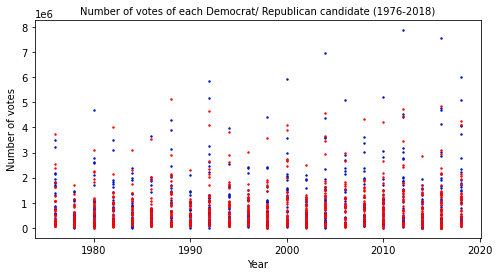

In [33]:
candidates_votes = senate_1976_2018['candidatevotes']

fig=plt.figure(figsize=(8, 4))
plt.xlabel("Year", fontsize=10)
plt.ylabel("Number of votes", fontsize=10)
#plt.xlim(min(Cal_annual['year']), max(Cal_annual['year']), 2)
#plt.xticks(np.arange(1976, 2020, step=2))
#plt.xticks(rotation=70)
plt.title("Number of votes of each Democrat/ Republican candidate (1976-2018)", fontsize=10)
plt.scatter(y_dem, dem, marker="o", color="#0015BC", label="Democrat", s=2)
plt.scatter(y_rep, rep, marker="o", color="#FF0000", label="Republican", s=2)
plt.show() 

<span style="color:#747678; font-size:14px;">It seems that outliers (high values) usually happen for Democraats.</span>

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Distribution of number of votes for each candidate within years (bar chart)</span></div>

<div style="color:#747678; font-weight:bold; font-size:15px;">Columns of importance for us are the followings:</div>
    <span style="color:lightsalmon; font-weight:bold; font-size:14px;">year</span> (1976, 2018)
<br>
    <span style="color:lightsalmon; font-weight:bold; font-size:14px;">state</span> 50 states of United States<br>
    <span style="color:lightsalmon; font-weight:bold; font-size:14px;">state_po </span>Abbreviation<br>
    <span style="color:lightsalmon; font-weight:bold; font-size:14px;">candidate</span> Candidates' name<br>
    <span style="color:lightsalmon; font-weight:bold; font-size:14px;">party</span> Political party (Republican, Democrat, Independent, Communist!, Social workers, ...)<br>
    <span style="color:lightsalmon; font-weight:bold; font-size:14px;">canditatevotes</span> Number of Votes for each candidate<br>
    <span style="color:lightsalmon; font-weight:bold; font-size:14px;">totalvotes </span> To preserve the ratio of elected candidate's votes<br><br>
<span style="color:#747678; font-size:14px;">Hence, we just preserve these columns and drop other columns.</span><br>

In [34]:
senate_1976_2018 = senate_1976_2018[['year', 'state', 'state_po', 'candidate', 'party', 'candidatevotes', 'totalvotes']]
senate_1976_2018

,year,state,state_po,candidate,party,candidatevotes,totalvotes
0,1976,Arizona,AZ,Sam Steiger,republican,321236,741210
1,1976,Arizona,AZ,Wm. Mathews Feighan,independent,1565,741210
2,1976,Arizona,AZ,Dennis DeConcini,democrat,400334,741210
3,1976,Arizona,AZ,Allan Norwitz,libertarian,7310,741210
4,1976,Arizona,AZ,Bob Field,independent,10765,741210
...,...,...,...,...,...,...,...
3416,2018,Wisconsin,WI,not recorded,not recorded,42,2657841
3417,2018,Wyoming,WY,John Barrasso,republican,136210,203420
3418,2018,Wyoming,WY,Gary Trauner,democrat,61227,203420
3419,2018,Wyoming,WY,Joseph Porambo,libertarian,5658,203420


<span style="color:#747678; font-size:14px;">This dataset contains 3421 rows and 7 columns, in the following I'll depict some informative plots more specifically changes between years.</span><br>

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Exploring California votes within years</span></div>

In [35]:
California = senate_1976_2018[senate_1976_2018['state'] == 'California'] #filtering rows of califonia 
California.tail() #last 5 elements of California

,year,state,state_po,candidate,party,candidatevotes,totalvotes
2677,2012,California,CA,Elizabeth Emken,republican,4713887,12578511
3073,2016,California,CA,Loretta Sanchez,democrat,4701417,12244170
3074,2016,California,CA,Kamala D. Harris,democrat,7542753,12244170
3273,2018,California,CA,Dianne Feinstein,democrat,6019422,11113364
3274,2018,California,CA,Kevin De Leon,democrat,5093942,11113364


In [36]:
print("There are {} records for California.".format(len(California)))

There are 88 records for California.


<div style="background-color:#FFCD00;"><span style="color:#182B49;">Filtering California based on year</span></div>

In [37]:
Cal_annual = California.groupby(['year']).sum().reset_index()
Cal_annual

,year,candidatevotes,totalvotes
0,1976,7470586,37352930
1,1980,8324012,41620060
2,1982,7805450,39027250
3,1986,7398462,36992310
4,1988,9743598,58461588
5,1992,21582446,129494676
6,1994,8514089,59598623
7,1998,8311905,58183335
8,2000,10623608,74365256
9,2004,12053295,72319770


<div style="background-color:#FFCD00;"><span style="color:#182B49;">California votes (total and elected candidates (1976-2018))</span></div>

<span style="color:#747678; font-size:14px;">Plotting number of votes and the ratio of the votes of elected candidate to total votes from 1976 to 2018</span><br>

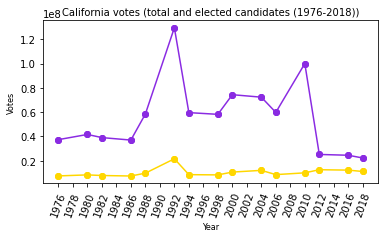

In [38]:
fig=plt.figure(figsize=(6, 3)) #future: women or men
plt.xlabel("Year", fontsize=8)
plt.ylabel("Votes", fontsize=8)
#plt.xlim(min(Cal_annual['year']), max(Cal_annual['year']), 2)
plt.xticks(np.arange(1976, 2020, step=2))
plt.xticks(rotation=70)
plt.title("California votes (total and elected candidates (1976-2018))", fontsize=10)
plt.scatter(list(Cal_annual['year']), list(Cal_annual['totalvotes']), marker="o", color="blueviolet")
plt.scatter(list(Cal_annual['year']), list(Cal_annual['candidatevotes']), marker="o", color="gold")
plt.plot(list(Cal_annual['year']), list(Cal_annual['totalvotes']), marker="o", color="blueviolet")
plt.plot(list(Cal_annual['year']), list(Cal_annual['candidatevotes']), marker="o", color="gold")
plt.show() 

<span style="color:#747678; font-size:14px;">Y axis unit is $1e8$</span><br>

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Senate elected candidate's votes ratio inCalifornia (1976-2018))</span></div>

<ipython-input-39-c4d26bea2a88>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


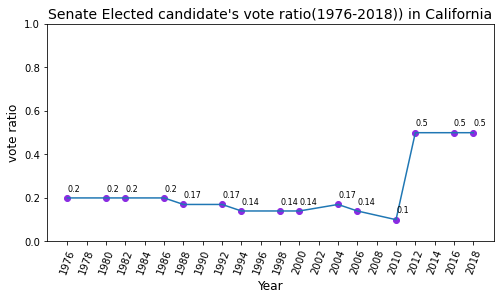

In [39]:
import numpy
from matplotlib import pyplot

ratio = [round(Cal_annual['candidatevotes'][i]/Cal_annual['totalvotes'][i], 2) for i in range(len(Cal_annual['candidatevotes']))] #elected candidate's vote ratio
fig=pyplot.figure(figsize=(8, 4))
plt.xticks(np.arange(0, 1, step=0.1))
plt.xlabel("Year", fontsize=12)
plt.ylabel("vote ratio", fontsize=12)
plt.title("Senate Elected candidate's vote ratio(1976-2018)) in California", fontsize=14)
plt.scatter(list(Cal_annual['year']), ratio, marker="o", color="blueviolet")
#plt.plot(list(Cal_annual['year']), ratio, color="crimson")
ax = fig.add_subplot(111)
ax.set_ylim(0,1)
plt.xticks(np.arange(1976, 2020, step=2))
plt.xticks(rotation=70)
pyplot.plot(list(Cal_annual['year']), ratio)
for i,j in zip(list(Cal_annual['year']), ratio):
    ax.annotate(str(j),xy=(i,j+0.03), fontsize=8)

pyplot.show()

<div style="background-color:#FFCD00;"><span style="color:#182B49;">US Parties candidate's votes piechart (2018)</span></div>

In [40]:
#preserving records of year 2006
senate_2018 = senate_1976_2018[senate_1976_2018['year'] == 2006]
#senate_2018

In [41]:
#grouping the above cell's data based on party (sum over states)
senate_2018 = senate_2018.groupby(['party'])[['party', 'candidatevotes', 'totalvotes']].sum().reset_index()
#senate_2018

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Senate parties vote ratio (1976-2018)</span></div>

In [246]:
#storing democratic parties daata
democratic = senate_1976_2018[senate_1976_2018['party'] == 'democrat'] 
democratic.head() #first 5 elements of California 
#len(democratic) 748

#storing democratic parties daata
republican = senate_1976_2018[senate_1976_2018['party'] == 'republican'] 
#republican.head() #first 5 elements of California 
#len(republican) 756

In [247]:
#grouping the above by year
democratic_1976_2018 = democratic.groupby(['year']).sum().reset_index()
republican_1976_2018 = republican.groupby(['year']).sum().reset_index()
#democratic_1976_2018

In [286]:
democratic_2018 = democratic[democratic['year']==2018]
#democratic_2018['candidatevotes']
republican_2018 = republican[republican['year']==2018]
#republican_2018['candidatevotes']

In [253]:
dem_2018 = democratic_1976_2018[democratic_1976_2018['year']==2018]
rep_2018 = republican_1976_2018[republican_1976_2018['year']==2018]

In [254]:
other = senate_1976_2018[senate_1976_2018['party'] != 'republican']
other = other[other['party'] != 'democrat']
other = other.groupby(['year']).sum().reset_index()
other_2018 = other[other['year']==2018]
other_2018

,year,candidatevotes,totalvotes
21,2018,5646026,218293773


In [255]:
rep_2018

,year,candidatevotes,totalvotes
21,2018,34721533,85409551


In [256]:
dem_2018

,year,candidatevotes,totalvotes
21,2018,49127318,96669047


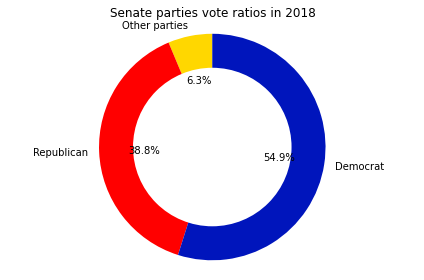

In [268]:
import matplotlib.pyplot as plt
labels =  ['Other parties', 'Republican', 'Democrat']
sizes = [5646026, 34721533, 49127318]
#colors
colors = ['gold', '#FF0000', '#0015BC']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
#fig = plt.figure(figsize=(10, 10))
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Senate parties vote ratios in 2018")
plt.tight_layout()
plt.show()

<ipython-input-44-a5620520a343>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


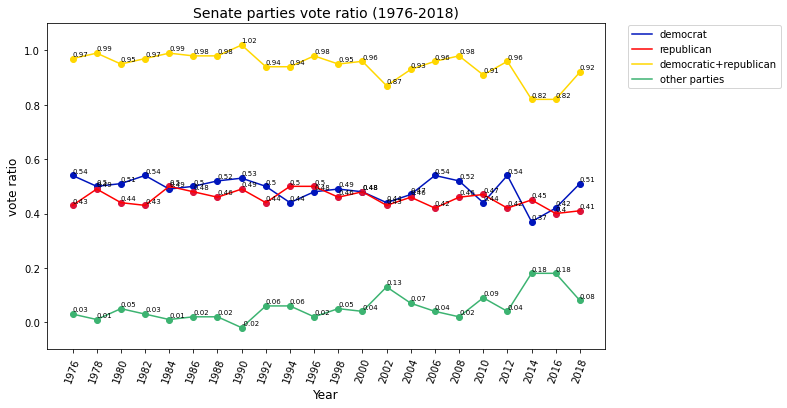

In [44]:
import numpy
from matplotlib import pyplot
from operator import add

ratio_dem = [round(democratic_1976_2018['candidatevotes'][i]/democratic_1976_2018['totalvotes'][i], 2) for i in range(len(democratic_1976_2018['candidatevotes']))] #elected candidate's vote ratio
ratio_rep = [round(republican_1976_2018['candidatevotes'][i]/republican_1976_2018['totalvotes'][i], 2) for i in range(len(republican_1976_2018['candidatevotes']))] #elected candidate's vote ratio
sum_rep_dem = list( map(add, ratio_dem, ratio_rep) ) #sum over all democratic and republican votes
sum_rep_dem = [round(i, 2) for i in sum_rep_dem] #round digits after 0
other_parties = [1-i for i in sum_rep_dem] #except for democratic and republican
other_parties = [round(i, 2) for i in other_parties] #round digits after 0

fig=pyplot.figure(figsize=(10, 6))
plt.xticks(np.arange(0, 1, step=0.1))
plt.xlabel("Year", fontsize=12)
plt.ylabel("vote ratio", fontsize=12)
plt.title("Senate parties vote ratio (1976-2018)", fontsize=14)
plt.scatter(list(democratic_1976_2018['year']), ratio_dem, marker="o", color="#0015BC")
plt.scatter(list(republican_1976_2018['year']), ratio_rep,  marker="o", color="crimson")
plt.scatter(list(republican_1976_2018['year']), sum_rep_dem,  marker="o", color="gold")
plt.scatter(list(republican_1976_2018['year']), other_parties,  marker="o", color="#3CB371")

ax = fig.add_subplot(111)
ax.set_ylim(-0.1,1.1)
plt.xticks(np.arange(1976, 2020, step=2))
plt.xticks(rotation=70)
pyplot.plot(list(democratic_1976_2018['year']), ratio_dem, color="#0015BC", label="democrat")
pyplot.plot(list(republican_1976_2018['year']), ratio_rep, color="#FF0000", label="republican")
pyplot.plot(list(republican_1976_2018['year']), sum_rep_dem, color="gold", label="democratic+republican")
pyplot.plot(list(republican_1976_2018['year']), other_parties, color="#3CB371",  label="other parties")

plt.legend(loc=(1.04,0.8))

#annotate the ratios above plot
for i,j in zip(list(democratic_1976_2018['year']), ratio_dem):
    ax.annotate(str(j),xy=(i,j+0.01), fontsize=7)
for i,j in zip(list(republican_1976_2018['year']), ratio_rep):
    ax.annotate(str(j),xy=(i,j+0.01), fontsize=7)
for i,j in zip(list(republican_1976_2018['year']), sum_rep_dem):
    ax.annotate(str(j),xy=(i,j+0.01), fontsize=7)
for i,j in zip(list(republican_1976_2018['year']), other_parties):
    ax.annotate(str(j),xy=(i,j+0.01), fontsize=7)
pyplot.show() #add label

<span style="color:#747678; font-size:14px;">Votes of all parties</span><br>

In [45]:
parties = list(np.unique(senate_1976_2018['party']))
print(len(parties), " different parties have participated in US Senate election from 1976 to 2018.")

165  different parties have participated in US Senate election from 1976 to 2018.


<span style="color:#747678; font-size:14px;">We cannot definitely plot all of these 165 parties, so we'll merge the ones with fewer votes.</span><br>

In [46]:
total_votes_1976_2018 = sum(senate_1976_2018['candidatevotes'])
total_votes_1976_2018

1386293078

In [47]:
parties_votes = {}
for party in parties:
    p = senate_1976_2018[senate_1976_2018['party'] == str(party)]
    parties_votes[str(party)] = round(sum(list(p.groupby(['year']).sum().reset_index()['candidatevotes']))/total_votes_1976_2018, 6)

In [48]:
'democrat' in parties_votes.keys()

True

In [49]:
#removing democrat and republican from the above dictionary
del parties_votes['democrat']
del parties_votes['republican']

<span style="color:#747678; font-size:14px;">Ratio over non-republican/democratic groups.</span><br>

In [50]:
print("total ratio of non-republican/non-democratic parties : {}", sum(list(parties_votes.values())))

total ratio of non-republican/non-democratic parties : {} 0.04835800000000003


In [51]:
for k, v in parties_votes.items():
    parties_votes[k] = v/0.04835800000000003

In [52]:
'democrat' in parties_votes.keys()

False

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Parties votes except democratic and republican</span></div>

In [53]:
#generating random colors
import matplotlib.pyplot as plt
import random

number_of_colors = len(parties_votes)

random_colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
<ipython-input-54-45c0025ac31d>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0, flags=flags)


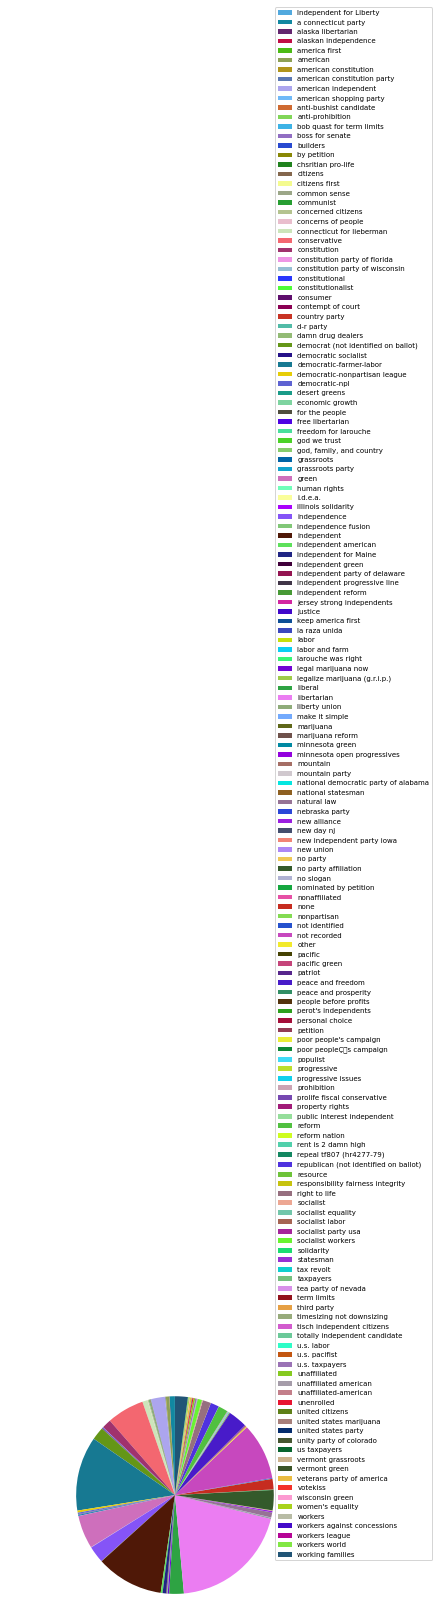

In [54]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 7
labels = list(parties_votes.keys())
sizes = list(parties_votes.values())
colors = random_colors
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc=(0.8,0.2))
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 7
labels = list(parties_votes.keys())
sizes = list(parties_votes.values())
colors = random_colors
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc=(0.8,0.2))
plt.axis('equal')
plt.tight_layout()
plt.show()

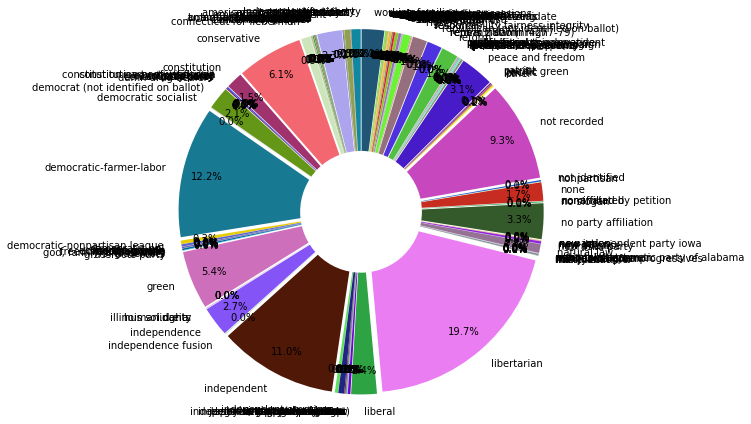

In [55]:
import matplotlib.pyplot as plt


plt.rcParams['font.size'] = 10
# Pie chart
labels = list(parties_votes.keys())
sizes = list(parties_votes.values())
#colors
colors = random_colors
#explsion
explode = [0.1 for i in parties_votes]
 
    
#patches, texts = plt.pie(sizes, colors=colors, startangle=90)
#plt.legend(patches, labels, loc="best")   
    
    
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.86, explode = explode, radius=2, labeldistance=1.1)
#plt.plot(flag_x, flag_y, marker='o', markersize=40, color="#FF0000")
#plt.plot(flag_x, flag_y, marker='o', markersize=20, color="#0015BC")
#plt.title("non-democrat / non-republican parties vote ratios (1976-2018)", fontsize=14) #future
#draw circle
centre_circle = plt.Circle((0,0.0),0.7,fc='white')
#fig=pyplot.figure(figsize=(10, 10))
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.show()
#future: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

In [56]:
#future: plot bar
#future: add data of 2020

<span style="color:#747678; font-size:14px;">Because the above chart is messy, we just preserve the ones above 10% which are libertarian, democratic-farmer-labor and independent</span><br>

In [57]:
#storing  parties data
democratic = senate_1976_2018[senate_1976_2018['party'] == 'democrat'] 
republican = senate_1976_2018[senate_1976_2018['party'] == 'republican'] 
libertatian = senate_1976_2018[senate_1976_2018['party'] == 'libertatian'] 
democratic_farmer_labor = senate_1976_2018[senate_1976_2018['party'] == 'democratic-farmer-labor'] 
independent = senate_1976_2018[senate_1976_2018['party'] == 'independent'] 

#grouping the above by year
democratic_1976_2018 = democratic.groupby(['year']).sum().reset_index()
republican_1976_2018 = republican.groupby(['year']).sum().reset_index()
libertatian_1976_2018 = libertatian.groupby(['year']).sum().reset_index()
democratic_farmer_labor_1976_2018 = democratic_farmer_labor.groupby(['year']).sum().reset_index()
independent_1976_2018 = independent.groupby(['year']).sum().reset_index()

#ratios
ratio_dem = [round(democratic_1976_2018['candidatevotes'][i]/democratic_1976_2018['totalvotes'][i], 2) for i in range(len(democratic_1976_2018['candidatevotes']))] #elected candidate's vote ratio
ratio_rep = [round(republican_1976_2018['candidatevotes'][i]/republican_1976_2018['totalvotes'][i], 2) for i in range(len(republican_1976_2018['candidatevotes']))] #elected candidate's vote ratio
ratio_libertatian = [round(libertatian_1976_2018['candidatevotes'][i]/libertatian_1976_2018['totalvotes'][i], 2) for i in range(len(libertatian_1976_2018['candidatevotes']))] #elected candidate's vote ratio
ratio_democratic_farmer_labor = [round(democratic_farmer_labor_1976_2018['candidatevotes'][i]/democratic_farmer_labor_1976_2018['totalvotes'][i], 2) for i in range(len(democratic_farmer_labor_1976_2018['candidatevotes']))] #elected candidate's vote ratio
ratio_independent = [round(independent_1976_2018['candidatevotes'][i]/independent_1976_2018['totalvotes'][i], 2) for i in range(len(independent_1976_2018['candidatevotes']))] #elected candidate's vote ratio


sum_1 = list( map(add, ratio_dem, ratio_rep) ) #sum over all democratic and republican votes
sum_1= [round(i, 2) for i in sum_1] #round digits after 0
sum_2= list( map(add, ratio_libertatian, ratio_democratic_farmer_labor) )
sum_2= [round(i, 2) for i in sum_2] #round digits after 0
sum_3= list( map(add, sum_1, sum_1) )
sum_3= [round(i, 2) for i in sum_3] #round digits after 0
sum_majority =  list( map(add, sum_3, ratio_independent))

other_parties = [1-i for i in sum_majority] #except for democratic and republican
other_parties = [round(i, 2) for i in sum_majority] #round digits after 0

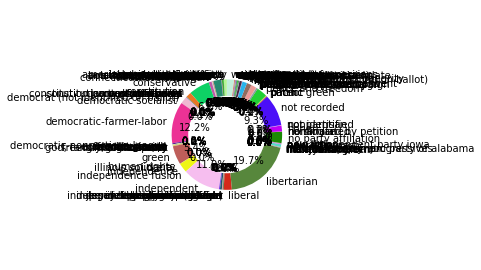

In [721]:
import matplotlib.pyplot as plt
labels = list(parties_votes.keys())
sizes = list(parties_votes.values())
#colors
colors = random_colors
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
#fig = plt.figure(figsize=(10, 10))
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [271]:
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [272]:
df = df[df['state']!='District of Columbia']

In [295]:
democratic_2018 = democratic[democratic['year']==2018]
d = democratic_2018[['state', 'candidatevotes']]
republican_2018 = republican[republican['year']==2018]
r = republican_2018[['state', 'candidatevotes']]

In [301]:
merged = pd.merge(r, df, on='state')
merged = pd.merge(merged, d, on='state')
merged.head() #candidates_x: republican

,state,candidatevotes_x,code,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,candidatevotes_y
0,Arizona,1135200,AZ,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,1191100
1,Connecticut,545717,CT,state,259.62,1.1,0.1,6.9,9.49,4.2,8.9,13.10,4.3,6.9,11.16,0.0,0.0,0.00,787685
2,Delaware,137127,DE,state,282.19,0.4,0.6,114.7,2.30,0.5,1.0,1.53,7.6,12.4,20.03,26.9,22.9,0.00,217385
3,Florida,4099505,FL,state,3764.09,42.6,0.9,56.9,66.31,438.2,933.1,1371.36,171.9,279.0,450.86,3.5,1.8,78.24,4089472
4,Hawaii,112035,HI,state,401.84,4.0,0.7,1.3,1.16,17.7,37.8,55.51,9.5,15.4,24.83,0.0,0.0,0.00,276316


In [315]:
d = [list(merged['candidatevotes_x'])[i]- list(merged['candidatevotes_y'])[i] for i in range(merged.shape[0])]

In [319]:
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = two, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Bluered',
    colorbar_title = "Millions",
))

fig.update_layout(
    title_text = 'Distribution of Female Black or African American Alone in 2010',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

<br><br><br><br><br><br><div style="background-color:crimson; color: lightsalmon; font-weight:bold; font-size:15px;">Annual State Resident Population Estimates for 6 Race Groups (5 Race Alone Groups and Two or More Races) by Age, Sex, and Hispanic Origin: April 1, 2010</div>

<span style="color:#747678; font-size:14px;">Although people can pre-register to vote varying from 16 to 18 in different states, based on <a href="usa.gov/voter-registration-age-requirements">USA government website</a>, for any given state, a citizen should be 18 or above to be allowed to vote in an official election. </span><br>

<span style="color:#747678; font-size:14px;">The <a href="https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/asrh/sc-est2019-alldata6.csv">dataset</a> I'm using is from US government website. I've also attached its description <a href="https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/sc-est2019-alldata6.pdf">pdf</a>.</span><br>
<span style="color:#747678; font-size:14px;">This data contains information about population of age 1 to 85+ and we filter out the population with age 18 and above as the population eligible to vote.<br>
This dataset contains the actual population of year 2010 and an estimate of population diversity from 2011 to 2019. I couldn't find any other dataset of the actual population diversity except for years 2011 to 2018 for each singular state. Hence, I'm doing this study for year 2010 and then will use another dataset which contains population diversity of 2019 roughly as information of year 2018 as this was the only other dataset I could find.<br>

Based on the <a href="https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/sc-est2019-alldata6.pdf">description file</a> the following is some information of  columns content<br>
    The key for <span style="color:#FF7F50">SUMLEV</span> is as follows:<br>
040 = State and/or Statistical Equivalent<br>
The key for Region is as follows:<br>
1 = Northeast<br>
2 = Midwest<br>
3 = South<br>
4 = West<br>
The key for <span style="color:#FF7F50">DIVISION</span> code is as follows:<br>
1 = New England<br>
2 = Middle Atlantic<br>
3 = East North Central<br>
4 = West North Central<br>
5 = South Atlantic<br>
6 = East South Central<br>
7 = West South Central<br>
8 = Mountain<br>
9 = Pacific<br>
    The key for <span style="color:#FF7F50">SEX</span> is as follows:<br>
0 = Total<br>
1 = Male<br>
2 = Female<br>
    The key for <span style="color:#FF7F50">ORIGIN</span> is as follows:<br>
0 = Total<br>
1 = Not Hispanic<br>
2 = Hispanic<br>
   The key for <span style="color:#FF7F50">RACE</span> is as follows:<br>
1 = White Alone<br>
2 = Black or African American Alone<br>
3 = American Indian or Alaska Native Alone<br>
4 = Asian Alone<br>
5 = Native Hawaiian and Other Pacific Islander Alone<br>
6 = Two or more races<br>
AGE is single-year of age (0, 1, 2,… 84, 85+ years).<br>
</span><br>
<span style="color:#747678; font-size:14px;">
 The dataset has already changed the categorical data to numerical. 
</span>

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Loading Dataset</span></div>

In [58]:
import pandas as pd
pop_diversity = pd.read_csv("sc-est2019-alldata6.csv", encoding = 'unicode_escape')

In [59]:
pop_diversity.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,3,6,1,Alabama,0,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,0,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,0,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,0,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


<div style="background-color:#FFCD00;"><span style="color:#182B49;">Exploring the dataset content</span></div>

In [60]:
pop_diversity.shape

(236844, 21)

<span style="color:#747678; font-size:14px;">Population diversity dataset contains 236844 rows and 21 columns</span>

In [61]:
#columns
np.array(pop_diversity.columns)

array(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'SEX', 'ORIGIN',
       'RACE', 'AGE', 'CENSUS2010POP', 'ESTIMATESBASE2010',
       'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
       'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
       'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018',
       'POPESTIMATE2019'], dtype=object)

In [62]:
pop_diversity.drop(['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
       'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
       'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018',
       'POPESTIMATE2019'], axis=1, inplace=True)

In [63]:
pop_diversity.head() #five first rows

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,ESTIMATESBASE2010
0,40,3,6,1,Alabama,0,0,1,0,37991,37991
1,40,3,6,1,Alabama,0,0,1,1,38150,38150
2,40,3,6,1,Alabama,0,0,1,2,39738,39738
3,40,3,6,1,Alabama,0,0,1,3,39827,39828
4,40,3,6,1,Alabama,0,0,1,4,39353,39353


<span style="color:#747678; font-size:14px;">Columns are <strong>'SUMLEV', 'region', 'division', 'state', 'name', 'sex', 'origin',
       'race', 'age', 'CENSUS2010POP', 'ESTIMATESBASE2010'</strong>.</span>

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Checking for null cells in the dataset </span></div>

<span style="color:#747678; font-size:14px;">Though in many cases one can substitute null cells within a dataset with the most common (frequent) value, mean, mode, etc of the corresponding column, here as we are dealing with the actual votes, if the number of null values are small and hence negligible, we won't substitute these null values and will delete the corresponding rows of the null elements.</span>

In [64]:
#columns which contain null values and the number of null elements
null_counts = pop_diversity.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) 

Series([], dtype: int64)

<span style="color:#747678; font-size:14px;">Happily, there's no null element in the dataset :)</span>

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Filterring out ages of $<18$</span></div>

In [65]:
pop_diversity = pop_diversity[pop_diversity['AGE']>=18]
print("There are {} rows and {} columns after filtering out ages lower than 18.".format(pop_diversity.shape[0], pop_diversity.shape[1]))
#pop_diversity.head()

There are 187272 rows and 11 columns after filtering out ages lower than 18.


In [66]:
#ommiting  other not-useful columns
pop_diversity.drop(['SUMLEV', 'REGION', 'ORIGIN', 'DIVISION', 'STATE', 'AGE', 'ESTIMATESBASE2010'], axis=1, inplace=True)

In [67]:
#pop_diversity.head()

In [68]:
print("There are {} rows and {} columns.".format(pop_diversity.shape[0], pop_diversity.shape[1]))

There are 187272 rows and 4 columns.


In [69]:
#changing the name of columns
pop_diversity.columns = ['state', 'sex', 'race', 'population']

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Filterring out sex=0 as it is the total and sum of 1 and 2.<br>
</span>
</div>
*There's no information about specefic sexual groups.

In [70]:
pop_diversity = pop_diversity[pop_diversity['sex'] != 0]
print("There are {} rows and {} columns.".format(pop_diversity.shape[0], pop_diversity.shape[1]))

There are 124848 rows and 4 columns.


In [71]:
pop_diversity.head()

,state,sex,race,population
1566,Alabama,1,1,22939
1567,Alabama,1,1,23818
1568,Alabama,1,1,23637
1569,Alabama,1,1,22637
1570,Alabama,1,1,22028


In [72]:
pop_diversity = pop_diversity.groupby(['state', 'sex', 'race']).sum().reset_index()

In [73]:
pop_diversity.head()

,state,sex,race,population
0,Alabama,1,1,2560692
1,Alabama,1,2,821494
2,Alabama,1,3,24462
3,Alabama,1,4,39122
4,Alabama,1,5,4182


<div style="background-color:#FFCD00;"><span style="color:#182B49;">Merging columns sex and race. </span></div>
<span style="color:#747678; font-size:14px;">
So (sex=1 and race=1) would be converted to White alone men. And preserving the corresponding population in a single column. Hence the first column above would beccome<br>
<br>
'state',    'white only men',  .....  'Two or more races women'<br>
Alabama, 22939, ...
<br>
The key for <span style="color:#FF7F50">SEX</span> is as follows:<br>
1 = Male<br>
2 = Female<br>
   The key for <span style="color:#FF7F50">RACE</span> is as follows:<br>
1 = White Alone<br>
2 = Black or African American Alone<br>
3 = American Indian or Alaska Native Alone<br>
4 = Asian Alone<br>
5 = Native Hawaiian and Other Pacific Islander Alone<br>
6 = Two or more races<br>
</span><br>
<span style="color:#747678; font-size:14px;">
So, we'll have $2 * 6 = 12$ combinations (columns):<br>
<span style="color:#FF7F50">1) </span>Female White Alone<br>
<span style="color:#FF7F50">2) </span>Female Black or African American Alone<br>
<span style="color:#FF7F50">3) </span>Female American Indian or Alaska Native Alone<br>
<span style="color:#FF7F50">4) </span>Female Asian Alone<br>
<span style="color:#FF7F50">5) </span>Female Native Hawaiian and Other Pacific Islander Alone<br>
<span style="color:#FF7F50">6) </span>Two or more races<br>
<span style="color:#FF7F50">7) </span>Male White Alone<br>
<span style="color:#FF7F50">8) </span>Male Black or African American Alone<br>
<span style="color:#FF7F50">9) </span>Male American Indian or Alaska Native Alone<br>
<span style="color:#FF7F50">10) </span>Male Asian Alone<br>
<span style="color:#FF7F50">11) </span>Male Native Hawaiian and Other Pacific Islander Alone<br>
<span style="color:#FF7F50">12) </span>Male Two or more races<br>

In [74]:
women = pop_diversity[pop_diversity['sex']==2]
men = pop_diversity[pop_diversity['sex']==1]

In [75]:
#future: racial diversity not immigraation as I couldnt find useful dataset for immigration

In [76]:
#creating a single dataframe for each of the above 12 groups, then merging them
one = women.groupby(['state']).sum().reset_index() #Female White Alone
one.drop(['sex', 'race'], axis=1, inplace=True)

In [77]:
one.columns = ['state', 'Female White Alone']

In [78]:
women[women['race']==1].head()

,state,sex,race,population
6,Alabama,2,1,2702622
18,Alaska,2,1,351856
30,Arizona,2,1,4178640
42,Arkansas,2,1,1852828
54,California,2,1,20945732


In [79]:
one = women[women['race']==1]
one.drop(['sex', 'race'], axis=1, inplace=True)
one.columns = ['state', 'one']

two = women[women['race']==2]
two.drop(['sex', 'race'], axis=1, inplace=True)
two.columns = ['state', 'two']

three = women[women['race']==3]
three.drop(['sex', 'race'], axis=1, inplace=True)
three.columns = ['state', 'three']

four = women[women['race']==4]
four.drop(['sex', 'race'], axis=1, inplace=True)
four.columns = ['state', 'four']

five = women[women['race']==5]
five.drop(['sex', 'race'], axis=1, inplace=True)
five.columns = ['state', 'five']

six = women[women['race']==6]
six.drop(['sex', 'race'], axis=1, inplace=True)
six.columns = ['state', 'six']

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
seven = men[men['race']==1]
seven.drop(['sex', 'race'], axis=1, inplace=True)
seven.columns = ['state', 'seven']

eight = men[men['race']==2]
eight.drop(['sex', 'race'], axis=1, inplace=True)
eight.columns = ['state', 'eight']

nine = men[men['race']==3]
nine.drop(['sex', 'race'], axis=1, inplace=True)
nine.columns = ['state', 'nine']

ten = men[men['race']==4]
ten.drop(['sex', 'race'], axis=1, inplace=True)
ten.columns = ['state', 'ten']

eleven = men[men['race']==5]
eleven.drop(['sex', 'race'], axis=1, inplace=True)
eleven.columns = ['state', 'eleven']

twelve = men[men['race']==6]
twelve.drop(['sex', 'race'], axis=1, inplace=True)
twelve.columns = ['state', 'twelve']

In [81]:
#merging all dataset to create a general one called "race_pop"
race_pop = one.copy()
race_pop['two'] = list(two['two'])
race_pop['three'] = list(three['three'])
race_pop['four'] = list(four['four'])
race_pop['five'] = list(five['five'])
race_pop['six'] = list(six['six'])
race_pop['seven'] = list(seven['seven'])
race_pop['eight'] = list(eight['eight'])
race_pop['nine'] = list(nine['nine'])
race_pop['ten'] = list(ten['ten'])
race_pop['eleven'] = list(eleven['eleven'])
race_pop['twelve'] = list(twelve['twelve'])

In [82]:
race_pop.head()

,state,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve
6,Alabama,2702622,1001622,23550,44474,2856,36352,2560692,821494,24462,39122,4182,33126
18,Alaska,351856,15286,71536,31348,4650,24586,400014,20000,71604,26296,4858,23672
30,Arizona,4178640,186474,227162,155778,10218,79896,4046060,204838,217594,131234,12524,75588
42,Arkansas,1852828,341484,18516,29894,3750,27014,1767470,294146,18606,26040,4136,25002
54,California,20945732,1879048,423972,4264134,132114,750356,20779794,1787846,441038,3691194,127982,694622


<span style="color:#747678; font-size:14px;">
As stated before, each of the columns stand for a racial group
</span>

In [83]:
print("Total votes of Alabama in 2010: ", sum(list(race_pop.iloc[0])[1:]))

Total votes of Alabama in 2010:  7294554


In [84]:
print("Total votes of Alabama in 2010: ", sum(list(pop_diversity[pop_diversity['state']=='Alabama']['population'])))

Total votes of Alabama in 2010:  7294554


<span style="color:#747678; font-size:14px;">
Hence, our calculation are right</span>

<span style="color:#747678; font-size:14px;">
Race_pop is the dataset containing number of votes for different racial/sexual groups (one, ...., twelve) for year 2010</span>

In [85]:
race_pop.shape #51 states

(51, 13)

In [86]:
race_pop.head()

,state,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve
6,Alabama,2702622,1001622,23550,44474,2856,36352,2560692,821494,24462,39122,4182,33126
18,Alaska,351856,15286,71536,31348,4650,24586,400014,20000,71604,26296,4858,23672
30,Arizona,4178640,186474,227162,155778,10218,79896,4046060,204838,217594,131234,12524,75588
42,Arkansas,1852828,341484,18516,29894,3750,27014,1767470,294146,18606,26040,4136,25002
54,California,20945732,1879048,423972,4264134,132114,750356,20779794,1787846,441038,3691194,127982,694622


In [87]:
CA = race_pop[race_pop['state']=="California"]
CA

,state,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve
54,California,20945732,1879048,423972,4264134,132114,750356,20779794,1787846,441038,3691194,127982,694622


<div style="background-color:#E6E6FA;"><span style="color:#8B008B; font-weight:bold; font-size:15px;">Querry: race/gender based population in different states<br>
</span>
</div>

In [88]:
#generating random colors
import matplotlib.pyplot as plt
import random

number_of_colors = 12

random_colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

In [89]:
result = {}
for i in range(race_pop.shape[0]):
    key = race_pop.iloc[i]['state']
    values = list(race_pop.iloc[i][1:])
    result[key] = values

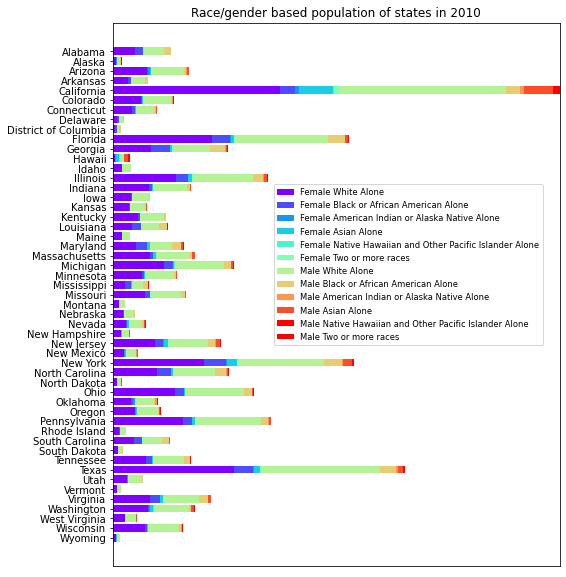

In [90]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Female White Alone',
'Female Black or African American Alone',
'Female American Indian or Alaska Native Alone',
'Female Asian Alone',
'Female Native Hawaiian and Other Pacific Islander Alone',
'Female Two or more races',
'Male White Alone',
'Male Black or African American Alone',
'Male American Indian or Alaska Native Alone',
'Male Asian Alone',
'Male Native Hawaiian and Other Pacific Islander Alone',
'Male Two or more races']

#results = sliced_counties
results = result
ncols = 12

def survey(results, category_names, ncols):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('rainbow')(
        np.linspace(0.001, 1.1, data.shape[1]))

    fig, ax = plt.subplots(figsize=(8, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.8,
                label=colname, color=color)
    ax.legend(ncol=1, bbox_to_anchor=(0.35,0.4),
              loc='lower left', fontsize='small')
    plt.title("Race/gender based population of states in 2010")

    return fig, ax

survey(results, category_names, ncols)
plt.savefig("race.png")
plt.show()

<div style="background-color:#E6E6FA;"><span style="color:#8B008B; font-weight:bold; font-size:15px;">Querry: mean and variance of each race in the whole country<br>
</span>
</div>

<span style="color:#747678; font-size:14px;">
What are the mean and variance population of people of all states?
</span>

In [91]:
minimum = []
maximum = []
mean = []
std = []
one = one['one']
two = two['two']
three = three['three']
four = four['four']
five = five['five']
six = six['six']
seven = seven['seven']
eight = eight['eight']
nine = nine['nine']
ten = ten['ten']
eleven = eleven['eleven']
twelve = twelve['twelve']

lists = [list(one), list(two), list(three), list(four), list(five), list(six), list(seven), list(eight), list(nine), list(ten), list(eleven), list(twelve)]
for l in lists:
    minimum.append(np.min(l))
    maximum.append(np.max(l))
    mean.append(np.mean(l))
    std.append(np.std(l))

In [92]:
categories = ['Female White Alone',
'Female Black or African American Alone',
'Female American Indian or Alaska Native Alone',
'Female Asian Alone',
'Female Native Hawaiian and Other Pacific Islander Alone',
'Female Two or more races',
'Male White Alone',
'Male Black or African American Alone',
'Male American Indian or Alaska Native Alone',
'Male Asian Alone',
'Male Native Hawaiian and Other Pacific Islander Alone',
'Male Two or more races']

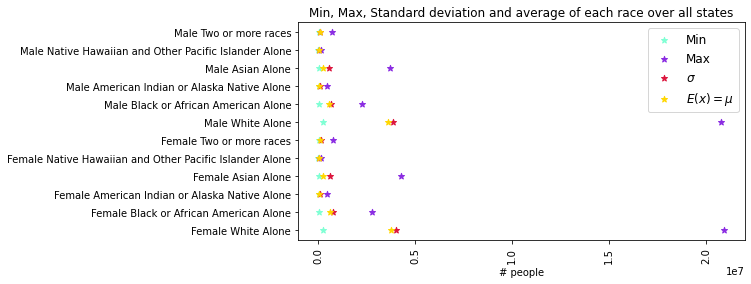

In [93]:
plt.figure(figsize=(8,4))
plt.scatter(minimum, categories, color="#7FFFD4", marker="*", label="Min", s=40)
plt.scatter(maximum, categories, color="#8A2BE2", marker="*",  label="Max", s=40)
plt.scatter(std, categories, color="#DC143C", marker="*", label="$\sigma$", s=40)
plt.scatter(mean, categories, color="#FFD700", marker="*",  label="$E(x)=\mu$", s=40)
plt.xticks(rotation=90)
plt.xlabel("# people")
plt.title("Min, Max, Standard deviation and average of each race over all states")
plt.legend(loc=1, prop={'size': 12})
plt.savefig("statistics.png")

<div style="background-color:#E6E6FA;"><span style="color:#8B008B; font-weight:bold; font-size:15px;">Querry: number of women and men in each state<br>
</span>
</div>

In [94]:
race_pop['women'] = race_pop['one']+race_pop['two']+race_pop['three']+race_pop['four']+race_pop['five']+race_pop['six']
race_pop['men'] = race_pop['seven']+race_pop['eight']+race_pop['nine']+race_pop['ten']+race_pop['eleven']+race_pop['twelve']

In [95]:
diff = [list(race_pop['women'])[i]-list(race_pop['men'])[i] for i in range(len(list(race_pop['women'])))]

In [97]:
states = list(race_pop['state'])

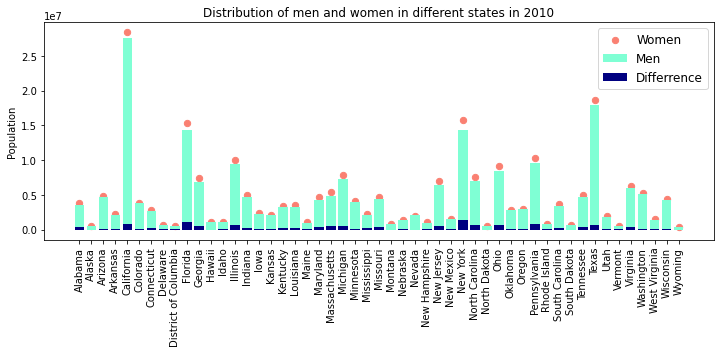

In [98]:
plt.figure(figsize=(12,4))
plt.scatter(states, race_pop['women'], color="salmon", label="Women", s=40)
plt.bar(states, race_pop['men'], color="#7FFFD4",  label="Men")
plt.bar(states, diff, color="navy",  label="Differrence")

plt.xticks(rotation=90)
plt.ylabel("Population")
plt.title("Distribution of men and women in different states in 2010")
plt.legend(loc=1, prop={'size': 12})
plt.savefig("men_women.png")

<span style="color:#747678; font-size:14px;">
It seems like number of women is higher than men in all states in 2010</span>

<br><br><br><br><br><br><div style="background-color:crimson; color: lightsalmon; font-weight:bold; font-size:15px;">Adding vote data to race/gender based population and doing prediction</div>

In [99]:
race_pop.head()

,state,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,women,men
6,Alabama,2702622,1001622,23550,44474,2856,36352,2560692,821494,24462,39122,4182,33126,3811476,3483078
18,Alaska,351856,15286,71536,31348,4650,24586,400014,20000,71604,26296,4858,23672,499262,546444
30,Arizona,4178640,186474,227162,155778,10218,79896,4046060,204838,217594,131234,12524,75588,4838168,4687838
42,Arkansas,1852828,341484,18516,29894,3750,27014,1767470,294146,18606,26040,4136,25002,2273486,2135400
54,California,20945732,1879048,423972,4264134,132114,750356,20779794,1787846,441038,3691194,127982,694622,28395356,27522476


In [100]:
senate_2010 = senate_1976_2018[senate_1976_2018['year']==2010]
senate_2010.head()

,year,state,state_po,candidate,party,candidatevotes,totalvotes
2429,2010,Alabama,AL,William G. Barnes,democrat,515619,1485499
2430,2010,Alabama,AL,not recorded,not recorded,1699,1485499
2431,2010,Alabama,AL,Richard C. Shelby,republican,968181,1485499
2432,2010,Alaska,AK,Tim Carter,nonaffiliated,927,255503
2433,2010,Alaska,AK,Ted Gianoutsos,nonaffiliated,458,255503


In [101]:
senate_2010.drop(['totalvotes', 'state_po', 'candidate', 'year'], axis=1, inplace=True)

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [102]:
 senate_2010.groupby(['state', 'party']).sum().reset_index().head()

,state,party,candidatevotes
0,Alabama,democrat,515619
1,Alabama,not recorded,1699
2,Alabama,republican,968181
3,Alaska,democrat,60045
4,Alaska,libertarian,1459


In [103]:
dem = senate_2010[senate_2010['party']=='democrat']
rep = senate_2010[senate_2010['party']=='republican']

In [104]:
dem.drop(['party'], axis=1, inplace=True)
rep.drop(['party'], axis=1, inplace=True)
len(dem), len(rep)

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(36, 38)

In [105]:
diff = []
for state in list(race_pop['state']) :
    if (state not in list(dem['state'])) or (state not in list(rep['state'])):
        diff.append(state)
np.array(diff) #states not in dem or rep (votes of the following is not preserved in dataset)

array(['District of Columbia', 'Maine', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Montana', 'Nebraska', 'New Jersey',
       'New Mexico', 'North Dakota', 'Rhode Island', 'South Dakota',
       'Tennessee', 'Texas', 'Virginia', 'Wyoming'], dtype='<U20')

In [106]:
#merging two datasets

In [107]:
merged = pd.merge(race_pop, dem, on='state')
merged.head()

,state,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,women,men,candidatevotes
0,Alabama,2702622,1001622,23550,44474,2856,36352,2560692,821494,24462,39122,4182,33126,3811476,3483078,515619
1,Alaska,351856,15286,71536,31348,4650,24586,400014,20000,71604,26296,4858,23672,499262,546444,60045
2,Arizona,4178640,186474,227162,155778,10218,79896,4046060,204838,217594,131234,12524,75588,4838168,4687838,592011
3,Arkansas,1852828,341484,18516,29894,3750,27014,1767470,294146,18606,26040,4136,25002,2273486,2135400,288156
4,California,20945732,1879048,423972,4264134,132114,750356,20779794,1787846,441038,3691194,127982,694622,28395356,27522476,5218441


In [108]:
merged.columns = merged.columns.str.replace('candidatevotes','Democrat')

In [109]:
merged = pd.merge(merged, rep, on='state')
merged.columns = merged.columns.str.replace('candidatevotes','Republican')
merged.head()

,state,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,women,men,Democrat,Republican
0,Alabama,2702622,1001622,23550,44474,2856,36352,2560692,821494,24462,39122,4182,33126,3811476,3483078,515619,968181
1,Alaska,351856,15286,71536,31348,4650,24586,400014,20000,71604,26296,4858,23672,499262,546444,60045,90839
2,Arizona,4178640,186474,227162,155778,10218,79896,4046060,204838,217594,131234,12524,75588,4838168,4687838,592011,1005615
3,Arkansas,1852828,341484,18516,29894,3750,27014,1767470,294146,18606,26040,4136,25002,2273486,2135400,288156,451618
4,California,20945732,1879048,423972,4264134,132114,750356,20779794,1787846,441038,3691194,127982,694622,28395356,27522476,5218441,4217366


In [110]:
merged['winner'] = np.sign(merged['Democrat']-merged['Republican'])

<span style="color:#747678; font-size:14px;">
Merged column is -1 for when Republicans are chosen and +1 when Democrats are chosen.</span>

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Linear regression on above data. Race columns as independent variables $(X)$ abd Democrat, Republican and Winner as dependent variables.</span></div>

In [111]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#reg.coef_accuracy_score(y_true, y_pred, normalize=False)
#reg.intercept_
reg.predict(np.array([[3, 5]]))

array([16.])

In [112]:
merged.head()

,state,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,women,men,Democrat,Republican,winner
0,Alabama,2702622,1001622,23550,44474,2856,36352,2560692,821494,24462,39122,4182,33126,3811476,3483078,515619,968181,-1
1,Alaska,351856,15286,71536,31348,4650,24586,400014,20000,71604,26296,4858,23672,499262,546444,60045,90839,-1
2,Arizona,4178640,186474,227162,155778,10218,79896,4046060,204838,217594,131234,12524,75588,4838168,4687838,592011,1005615,-1
3,Arkansas,1852828,341484,18516,29894,3750,27014,1767470,294146,18606,26040,4136,25002,2273486,2135400,288156,451618,-1
4,California,20945732,1879048,423972,4264134,132114,750356,20779794,1787846,441038,3691194,127982,694622,28395356,27522476,5218441,4217366,1


In [113]:
x_ = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve']

<div style="background-color:#FFCD00;"><span style="color:#182B49;">SVM</span></div>

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
X = merged[x_]
y = merged['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
#X_train.shape, y_train.shape
#X_test.shape, y_test.shape
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [115]:
pred = {'SVM': [],
       'KNN': [], 
       'Regression': [],a
       'Random Forest': []}

In [130]:
def SVM(ratio):
    av = []
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=0)
        clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
        av.append(clf.score(X_test, y_test))
    return np.mean(av)

In [131]:
SVM(0.1)

1.0

In [132]:
SVM(0.2)

0.5

Text(0.5, 1.0, 'Accuracy of Winner Prediction with different test sizes (SVM)')

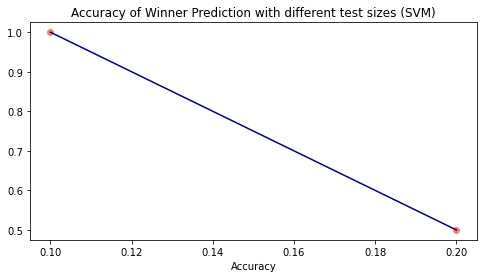

In [137]:
plt.figure(figsize=(8,4))
plt.scatter([0.1, 0.2], [1, 0.5], color="salmon")
plt.plot([0.1, 0.2], [1, 0.5], color="navy")
plt.xlabel("test set ratio")
plt.xlabel("Accuracy")
plt.title("Accuracy of Winner Prediction with different test sizes (SVM)")

<div style="background-color:#FFCD00;"><span style="color:#182B49;">KNN</span></div>

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def KNN(ratio, k):
    av = []
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=0)
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)
        predicted = neigh.predict(X_test)
        av.append(accuracy_score(predicted, y_test))
    return np.mean(av)

In [143]:
k =3
KNN(0.1, k)

1.0

In [145]:
KNN(0.2, k)

0.625

In [146]:
KNN(0.3, k)

0.75

In [147]:
KNN(0.3, 5)

0.5833333333333334

<div style="background-color:#FFCD00;"><span style="color:#182B49;">Random Forest</span></div>

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [156]:
def rf(ratio):
    av = []
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=0)
        clf = RandomForestClassifier(max_depth=10, random_state=0)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        av.append(accuracy_score(predicted, y_test))
    return np.mean(av)

In [157]:
rf(0.1)

1.0

In [159]:
rf(0.2)

0.875

In [160]:
rf(0.3)

0.75

In [170]:
pred = {'SVM': [1, 0.5, 0.5],
       'KNN': [1, 0.675, 0.75], 
       'Regression': [0, 0, 0],
       'Random Forest': [1, 0.875, 0.75]}

In [174]:
pred['SVM']

[1, 0.5, 0.5]

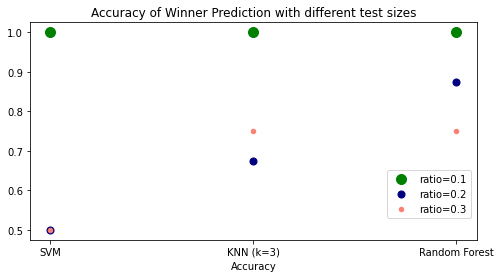

In [213]:
plt.figure(figsize=(8,4))
plt.scatter(['SVM', 'KNN (k=3)',  'Random Forest'], [1, 1, 1], color="green", label="ratio=0.1", s= 100)
plt.scatter(['SVM', 'KNN (k=3)',  'Random Forest'], [0.5, 0.675, 0.875], color="navy", label="ratio=0.2", s=50)
plt.scatter(['SVM', 'KNN (k=3)', 'Random Forest'], [0.5, 0.75, 0.75], color="salmon", label="ratio=0.3", s= 20)

#plt.plot(pred.keys(), pred.values() , color="navy", label="SVM", s=40)
plt.xlabel("test set ratio")
plt.xlabel("Accuracy")
plt.title("Accuracy of Winner Prediction with different test sizes")
plt.legend(loc=(0.8,0.1))